In [1]:
import pandas as pd
import numpy as np
import random
data=pd.read_csv("housing.csv")
number_of_iterations=100000
np.random.seed(42)
x=np.array(data.drop(['MEDV'],axis='columns'))
y=np.array(data['MEDV'])
m=len(x)
n=len(data.columns)-1
w=np.zeros(n)
b=np.full((1,m),0).astype('float32')
def gradient_decent(x,y,w,b,number_of_iterations):
    m=len(x)
    n=len(data.columns)-1
    a=0.02
    for i in range(number_of_iterations):
        value=np.dot(w.T,x.T)+b
        error=value-y
        dw=(a/m)*(np.dot(x.T,error.T))
        db=(a/m)*np.sum(error)
        w=w-dw
        b-=db
    w1=np.array([w[i][0] for i in range(n)])
    return w1,b[0]
def predict(data_point,w,b):
    n=len(data_point)
    b1=np.full((1,n),b)
    value=np.dot(w.T,data_point.T)+b1
    return value

In [2]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


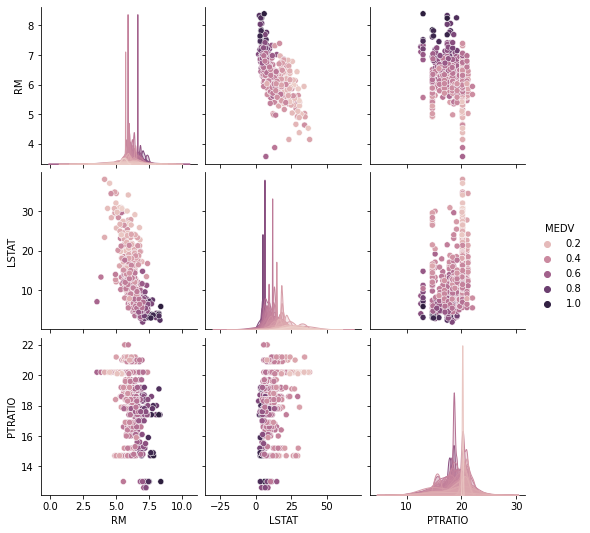

In [3]:
import seaborn as s
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
s.pairplot(data,hue="MEDV")
np.seterr(all='ignore')
plt.show()

In [4]:
def standardization(data):
    columns=data.columns
    for i in range(len(columns)-1):
        max_m=data[columns[i]].max()
        data[columns[i]]=np.abs((data[columns[i]]-max_m)/max_m)
standardization(data)
def train_test_split(dataset):
    training_data = dataset.iloc[:80].reset_index(drop=True)
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(data)[1]
testing_data = train_test_split(data)[0]
x1=np.array(training_data.drop(['MEDV'],axis='columns'))
y1=np.array(training_data['MEDV'])
m=len(x1)
n=len(data.columns)-1
w=np.random.rand(n)
# w=np.zeros(n)
# e=random.random()
b=np.full((1,m),0).astype('float32')
w1,b1=gradient_decent(x1,y1,w,b,number_of_iterations)

In [5]:
# theta=np.dot(np.dot(np.linalg.inv(np.dot((x.T),x)),x.T),y)
# theta

In [6]:
# predict(testing_data[0],w1,b1[0])

In [7]:
# predict(x1[488],w1,b1[0])
predicted_train=predict(np.array(training_data.drop(['MEDV'],axis='columns')),w1,b1[0])[0]
actual_train=np.array(training_data['MEDV'])

In [8]:
# predict(x1[1:11],w1,b1[0])
predicted=predict(np.array(testing_data.drop(['MEDV'],axis='columns')),w1,b1[0])[0]
actual=np.array(testing_data['MEDV'])

In [9]:
# predicted=predict(np.array(testing_data.drop(['MEDV'],axis='columns'),w1,b1[0])[0]
# actual=np.array(testing_data['MEDV'])
# rmse=np.sqrt(np.sum(np.square(predicted-actual))/11)
# rmse

In [10]:
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
#     ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])
    
    r_sqr = 1 - (sse / sst)
    
    return r_sqr
r_test=r_squared(actual,predicted)
r_train=r_squared(actual_train,predicted_train)
print("prediction accuracy of testing set",r_test*100,'%')
print("prediction accuracy of training set",r_train*100,'%')

prediction accuracy of testing set 75.34424825362723 %
prediction accuracy of training set 71.39733361384522 %


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x1, y1)

Y_pred = reg.predict(testing_data.drop(['MEDV'],axis='columns'))
r2_score = reg.score(testing_data.drop(['MEDV'],axis='columns'), testing_data['MEDV'])
print("prediction accuracy of testing set",r2_score*100,'%')
Y_pred_train = reg.predict(training_data.drop(['MEDV'],axis='columns'))
r2_score_train = reg.score(training_data.drop(['MEDV'],axis='columns'), training_data['MEDV'])
print("prediction accuracy of training set",r2_score_train*100,'%')

prediction accuracy of testing set 75.35263349655987 %
prediction accuracy of training set 71.39733727990294 %
